# Background Magic Example

This notebook demonstrates the `%%background` magic.

## Installation (if needed)

Ensure you have installed the package from the project root directory:

```bash
# pip install -e .
```

## Load the Extension

In [1]:
%load_ext background_magic

## 1. Simple Background Task

Run the cell below. While it's running (showing the `Running...` indicator), immediately run the next cell (`print('Hello from main thread!')`).

In [2]:
%%background

import time

print("Starting background task 1...")
for i in range(5):
    print(f"Background task 1: loop {i+1}/5")
    time.sleep(2.5) # Simulate work
print("Background task 1 finished.")

[Warning] Failed to configure Plotly: module 'plotly.graph_objs' has no attribute '_figure'


Starting background task 1...
Background task 1: loop 1/5
Background task 1: loop 2/5
Background task 1: loop 3/5
Background task 1: loop 4/5
Background task 1: loop 5/5
Background task 1 finished.


In [3]:
%%background

import time

print("Starting background task 1...")
for i in range(5):
    print(f"Background task 2: loop {i+1}/5")
    time.sleep(2.5) # Simulate work
print("Background task 1 finished.")

[Warning] Failed to configure Plotly: module 'plotly.graph_objs' has no attribute '_figure'


Starting background task 1...
Background task 2: loop 1/5
Background task 2: loop 2/5
Background task 2: loop 3/5
Background task 2: loop 4/5
Background task 2: loop 5/5
Background task 1 finished.


In [4]:
b = 10

In [5]:
%%background

import time

print("Starting background task 1...")
for i in range(5):
    print(b)
    print(f"Background task 1: loop {i+1}/5")
    time.sleep(2.5) # Simulate work
print("Background task 1 finished.")

[Warning] Skipping non-serializable global variable 'get_ipython' (type: method). Error: cannot pickle 'sqlite3.Connection' object
[Warning] Skipping non-serializable global variable 'exit' (type: ZMQExitAutocall). Error: cannot pickle 'sqlite3.Connection' object
[Warning] Skipping non-serializable global variable 'quit' (type: ZMQExitAutocall). Error: cannot pickle 'sqlite3.Connection' object


Starting background task 1...
10
Background task 1: loop 1/5


10
Background task 1: loop 2/5
10
Background task 1: loop 3/5
10
Background task 1: loop 4/5
10
Background task 1: loop 5/5
Background task 1 finished.


In [11]:
# Execute this cell *while* the cell above is running
print('Hello from main thread!')
import time
time.sleep(1) # Give task 1 a chance to print something else
print('Main thread done sleeping.')

Hello from main thread!


Main thread done sleeping.


## 2. Background Task with Error

In [4]:
%%background

import time

print("Starting background task 2 (will raise error)...")
time.sleep(2)
print("About to divide by zero...")
result = 1 / 0
print("This will not be printed.")

Starting background task 2 (will raise error)...


About to divide by zero...


Traceback (most recent call last):
  File "/home/research/Dropbox/projects/ideas/jupyter-runinbackground/background_magic/background_runner.py", line 101, in run_code_in_background
    exec(code_str, exec_globals)
  File "<string>", line 7, in <module>
ZeroDivisionError: division by zero


## 3. Multiple Concurrent Tasks

In [5]:
%%background
import time
print("Task A started")
time.sleep(4)
print("Task A finished")

Task A started


Task A finished


In [10]:
%%background
import time
print("Task B started")
time.sleep(6)
print("Task B finished")

In [ ]:
print("Both background tasks A and B should be running concurrently now.")

In [6]:

import time
import matplotlib.pyplot as plt
import numpy as np
import matplotlib

%matplotlib inline
%load_ext background_magic

The background_magic extension is already loaded. To reload it, use:
  %reload_ext background_magic


[Debug] Matplotlib patched successfully


[Debug] Using Plotly version: 5.18.0
[Debug] Plotly Express available
[Debug] Plotly successfully patched
Background task with print and plot starting...
Data generated, creating plot...



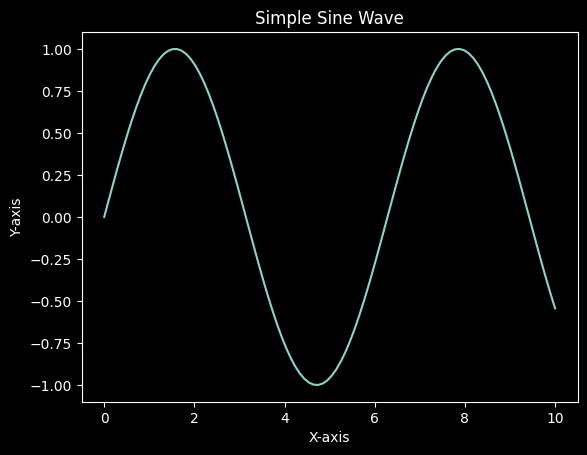

[Debug] Matplotlib figure displayed
Data generated, creating plot...
Plot generated and shown.
Background task with print and plot finished.


In [7]:
%%background




print("Background task with print and plot starting...")
time.sleep(1)

# Generate some data
x = np.linspace(0, 10, 100)
y = np.sin(x)

print("Data generated, creating plot...")
time.sleep(1)

# Create the plot
fig, ax = plt.subplots()
ax.plot(x, y)
ax.set_title("Simple Sine Wave")
ax.set_xlabel("X-axis")
ax.set_ylabel("Y-axis")

# IMPORTANT: Display the plot so it can potentially be captured
plt.show() 
# Alternatively, in some setups, just having the fig object might trigger display,
# but explicitly calling plt.show() is usually more reliable for scripts.


# Generate some data
x = np.linspace(0, 10, 100)
y = np.cos(x)

print("Data generated, creating plot...")
time.sleep(1)

# Create the plot
fig, ax = plt.subplots()
ax.plot(x, y)
ax.set_title("Simple Sine Wave")
ax.set_xlabel("X-axis")
ax.set_ylabel("Y-axis")

time.sleep(10)
print("Plot generated and shown.")
time.sleep(1)
print("Background task with print and plot finished.")

In [1]:
import plotly.express as px
%load_ext background_magic

[Debug] Matplotlib patched successfully


[Debug] Using Plotly version: 5.18.0
[Debug] Plotly Express available
[Debug] Plotly successfully patched
Background task with print and plot starting...
Data generated, creating first plot...
[Debug] fig.show() called
[Debug] Display called for figure type: <class 'plotly.graph_objs._figure.Figure'>
[Debug] Plotly figure saved to plotly_figure_9216b938.html


⬇️ Download Interactive Plot
 
 
 (static preview below, download for interactive version)
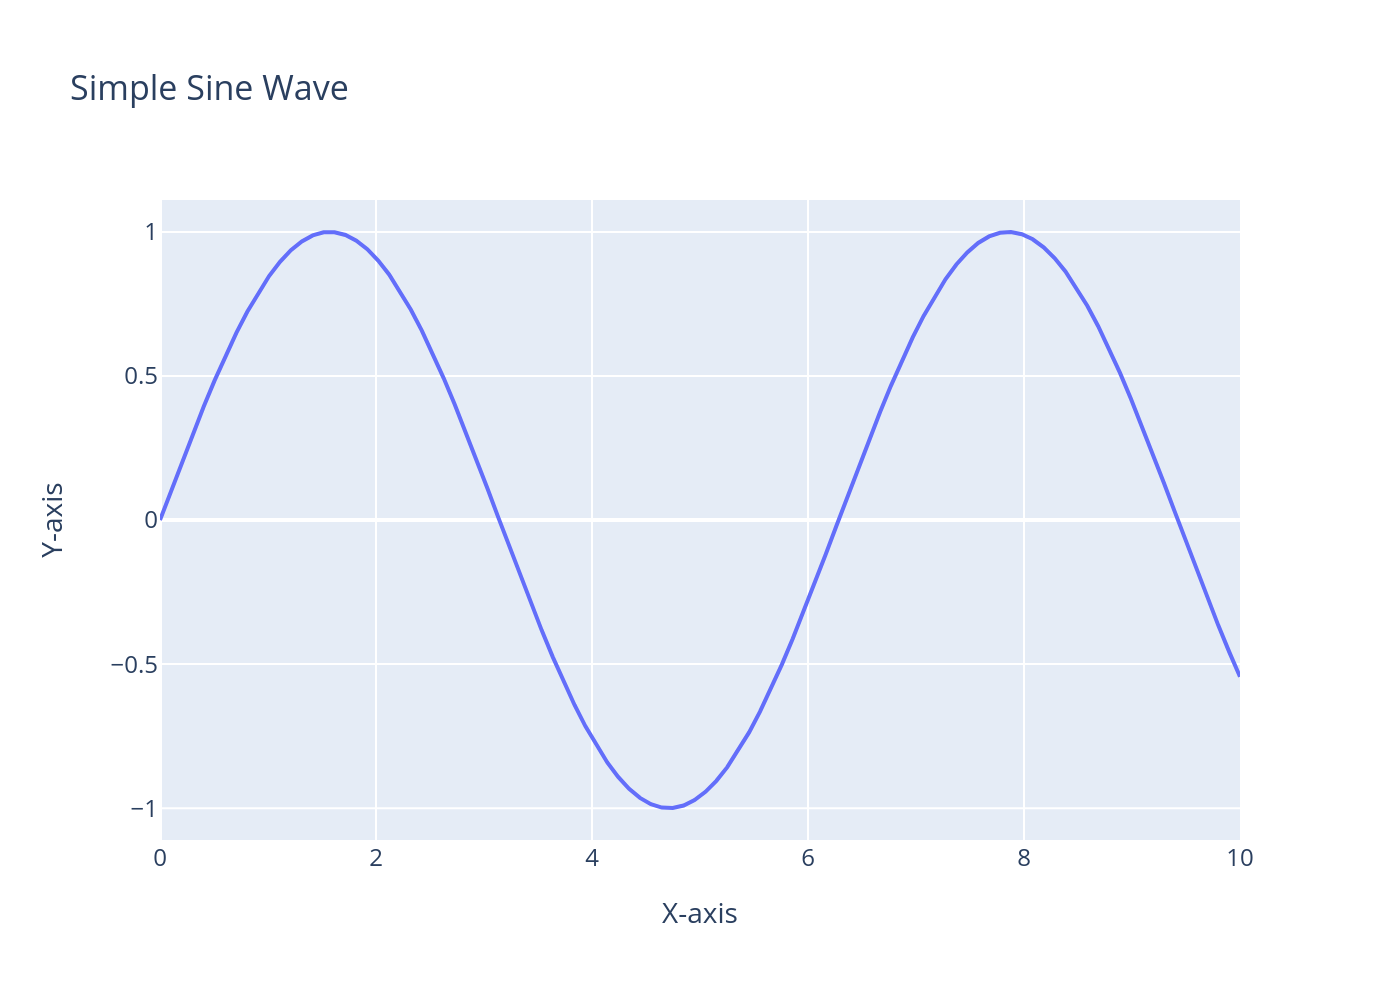

[Debug] Static image with download link displayed
Data generated, creating second plot...
[Debug] fig.show() called
[Debug] Display called for figure type: <class 'plotly.graph_objs._figure.Figure'>
[Debug] Plotly figure saved to plotly_figure_6d9e125d.html


⬇️ Download Interactive Plot
 
 
 (static preview below, download for interactive version)
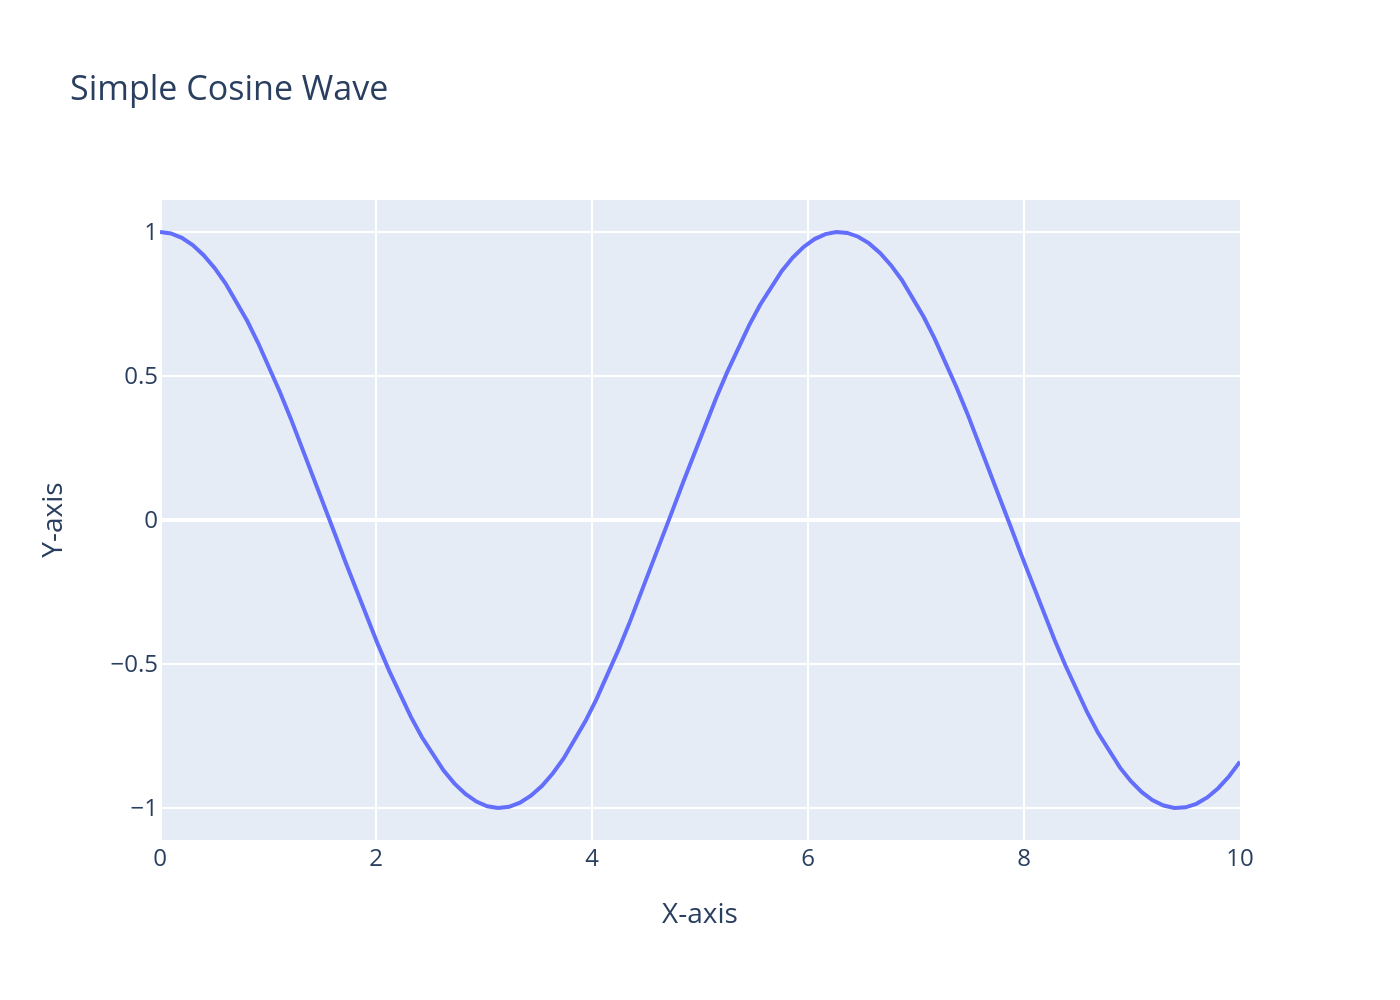

[Debug] Static image with download link displayed
Plots generated and shown.
Background task with print and plot finished.


In [2]:
%%background

import plotly.express as px
import numpy as np
import time

print("Background task with print and plot starting...")
time.sleep(1)

# Generate some data for first plot
x = np.linspace(0, 10, 100)
y = np.sin(x)

print("Data generated, creating first plot...")
time.sleep(1)

# Create the first plot with Plotly Express
fig1 = px.line(x=x, y=y, title="Simple Sine Wave",
              labels={'x': 'X-axis', 'y': 'Y-axis'})
fig1.show()

# Generate some data for second plot
x = np.linspace(0, 10, 100)
y = np.cos(x)

print("Data generated, creating second plot...")
time.sleep(1)

# Create the second plot with Plotly Express
fig2 = px.line(x=x, y=y, title="Simple Cosine Wave",
              labels={'x': 'X-axis', 'y': 'Y-axis'})
fig2.show()

time.sleep(10)
print("Plots generated and shown.")
time.sleep(1)
print("Background task with print and plot finished.")

## 4. Unload the Extension

This will attempt to stop any remaining background tasks.

In [ ]:
# %unload_ext background_magic
# print('Extension unloaded')

## 4. Test Access to Various Global Variable Types

In [1]:
# Define various global variables
import pandas as pd

global_string = "A global string"
global_int = 42
global_list = [1, 2, 3, 'a']
global_dict = {'key': 'value', 'number': 123}
global_df = pd.DataFrame({'col1': [10, 20], 'col2': ['X', 'Y']})

def global_regular_function(x):
    return f"Function called with {x}"

global_lambda = lambda y: y * 2

# A variable that might be tricky to pickle (e.g., a generator)
# We expect this to be skipped based on our current serialization logic
# global_generator = (i for i in range(3)) 

print("Global variables defined.")

Global variables defined.


In [ ]:
%%background

import time

print("--- Testing access to globals in background ---")

# Try accessing each type
try:
    print(f"String: {global_string}")
    print(f"Integer: {global_int}")
    print(f"List: {global_list}")
    print(f"Dict: {global_dict}")
    print("DataFrame:\n", global_df)
    print(f"Function result: {global_regular_function('test')}")
    print(f"Lambda result: {global_lambda(5)}")
except NameError as e:
    print(f"ERROR: Failed to access a global variable: {e}")
except Exception as e:
    print(f"ERROR during global access test: {e}")

# Test modifying a mutable object (list) copy
try:
   global_list.append('modified_in_bg')
   print(f"Modified list copy: {global_list}")
except NameError:
   pass # Error already printed above

print("--- Finished testing globals in background ---")
time.sleep(1)

[Info] Skipped potentially non-serializable global variables: ['__name__', '__doc__', '__package__', '__loader__', '__spec__', '__builtin__', '__builtins__', '_ih', '_oh', '_dh', 'get_ipython', 'exit', 'quit', '_', '__', '___', '__vsc_ipynb_file__', 'matplotlib', '_VSCode_defaultMatplotlib_Params', '_i', '_ii', '_iii', '_i1', 'pd', '_2', '_i2', '_3', '_i3', '_4', '_i4']


In [ ]:
# Check that the original global list was NOT modified
print("Checking original global list after background task:")
print(global_list)